In [237]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt

In [359]:
data=pd.read_excel("Resultats/Performance.xlsx",skiprows=1)

data.columns=["Nx","Temps","P_Inversion","P_Initialisation","P_Affichage", "RAM"]
data["T_Inversion"]=data.Temps*data.P_Inversion/100
data["T_Initialisation"]=data.Temps*data.P_Initialisation/100
data["T_Affichage"]=data.Temps*data.P_Affichage/100

data=data[:]
data

,Nx,Temps,P_Inversion,P_Initialisation,P_Affichage,RAM,T_Inversion,T_Initialisation,T_Affichage
0,100,2.29,7.0,35.0,58.0,0.225,0.1603,0.8015,1.3282
1,200,5.30,17.2,53.6,29.2,0.310,0.9116,2.8408,1.5476
2,300,10.00,25.3,59.2,15.5,0.513,2.5300,5.9200,1.5500
3,400,18.00,32.9,57.7,9.4,0.807,5.9220,10.3860,1.6920
4,500,28.00,35.5,57.6,6.9,1.200,9.9400,16.1280,1.9320
5,600,43.00,40.3,54.6,5.1,1.900,17.3290,23.4780,2.1930
6,700,68.50,48.8,46.7,4.5,2.800,33.4280,31.9895,3.0825
7,800,89.00,48.9,47.8,3.3,3.600,43.5210,42.5420,2.9370
8,900,117.00,51.2,45.8,3.0,4.600,59.9040,53.5860,3.5100
9,1000,175.00,59.5,38.2,2.3,5.800,104.1250,66.8500,4.0250


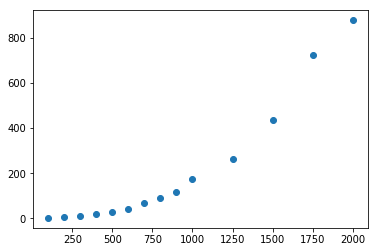

In [277]:
plt.scatter(data.Nx,data.Temps)

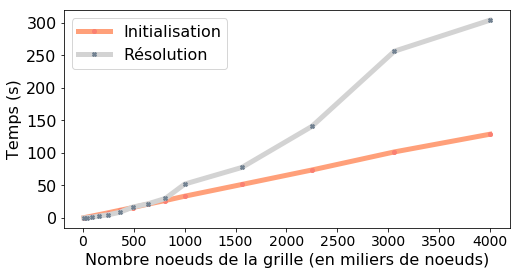

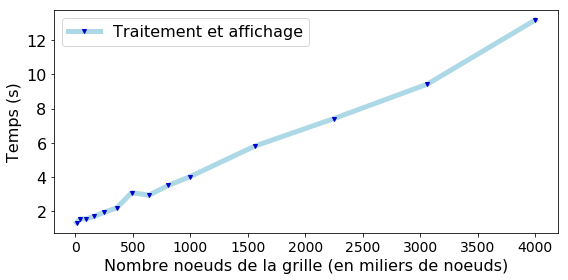

In [352]:
fig,ax=plt.subplots(1,1,figsize=(8,4))
#T=np.array((data.Nx**2))/1000
#ax.plot(T,(T/150)**2)
ax.plot(np.array((data.Nx**2))/1000,data.T_Initialisation, marker="o", markersize=4, lw=5, label="Initialisation", color="lightsalmon",\
           alpha=1.0, mfc="salmon",mec="salmon")
ax.set_xlabel("Nombre noeuds de la grille (en miliers de noeuds)", fontsize=16)
plt.draw()
ax.set_xticklabels(ax.get_xticklabels(),fontsize=14, rotation=0)
ax.set_ylabel("Temps (s)", fontsize=16)
ax.set_yticklabels(ax.get_yticklabels(),fontsize=16)
# ax[0].set_yticks(np.arange(0,1201,200))
ax.plot(np.array((data.Nx**2))/1000,data.T_Inversion, marker="X", markersize=4, lw=5,label="Résolution",color="lightgray",\
           alpha=1.0, mfc="slategray",mec="slategray")
ax.legend(fontsize=16)
plt.savefig("Resultats/Temps_Nx_Resolution_Initialisation.png",dpi=200,bbox_inches='tight')
plt.show()

# ax[0].text(197,10,"A)",fontsize=16,fontweight="bold")

fig,ax=plt.subplots(1,1,figsize=(8,4))
ax.plot(np.array((data.Nx**2))/1000,data.T_Affichage, marker="v", markersize=4, lw=5,label="Traitement et affichage",color="lightblue",\
           alpha=1.0, mfc="mediumblue",mec="mediumblue")

ax.set_xlabel("Nombre noeuds de la grille (en miliers de noeuds)", fontsize=16)
plt.draw()
#ax.text(4000*1000,2.5,"B)",fontsize=16,fontweight="bold")
ax.set_xticklabels(ax.get_xticklabels(),fontsize=14, rotation=0)
ax.set_ylabel("Temps (s)", fontsize=16)
ax.set_yticklabels(ax.get_yticklabels(),fontsize=16)
ax.set_ylabel("Temps (s)", fontsize=16)

# ax[1].set_yticklabels(np.arange(0,16.1,4,dtype=np.int),fontsize=16)
# ax[1].set_yticks(np.arange(0,16.1,4))
ax.legend(fontsize=16)
plt.savefig("Resultats/Temps_Nx_Affichage.png",dpi=200, bbox_inches='tight')
plt.tight_layout()
plt.show()



# RAM

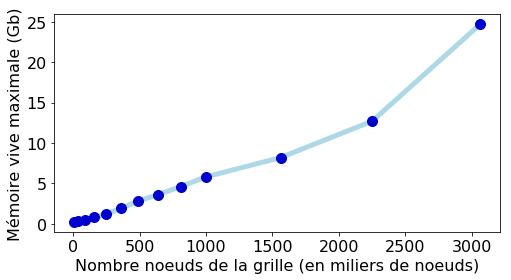

In [382]:
plt.figure(figsize=(8,4))
plt.plot(np.array((data.Nx[:-1]**2))/1000,data.RAM[:-1],marker="o", markersize=10,lw=5,color="lightblue",\
           alpha=1.0, mfc="mediumblue",mec="mediumblue")
plt.ylabel("Mémoire vive maximale (Gb)", fontsize=16)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.xlabel("Nombre noeuds de la grille (en miliers de noeuds)", fontsize=16)
plt.savefig("Resultats/RAM.png",dpi=200,bbox_inches="tight")

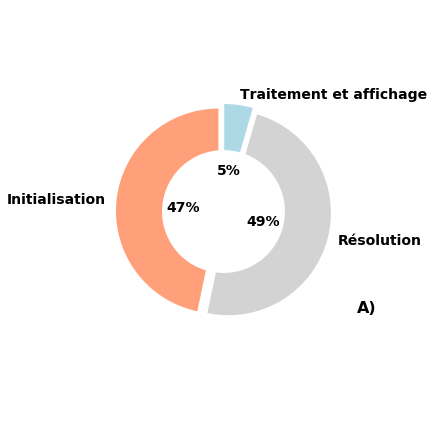

In [354]:
import matplotlib.pyplot as plt
# Pie chart
labels = ['Initialisation', 'Résolution', 'Traitement et affichage']
sizes = [46.7, 48.8, 4.5]
#colors
colors = ['lightsalmon','lightgray','lightblue']
 
fig1, ax = plt.subplots(figsize=(6,6))
explode = (0.05,0.05,0.05)
patches, texts, autotexts=ax.pie(sizes, colors = colors, labels=labels, autopct='%1.0f%%', pctdistance=0.35, startangle=90,explode=explode, textprops={'fontsize': 14, "fontweight":"bold"})
#draw circle
centre_circle = plt.Circle((0,0),0.60,fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)
# Equal aspect ratio ensures that pie is drawn as a circle
ax.axis('equal') 
ax.text(1.3,-0.99,"A)",fontsize=16,fontweight="bold")
plt.tight_layout()
plt.savefig("Resultats/Repartition.png",dpi=200, bbox_inches='tight')


plt.show()

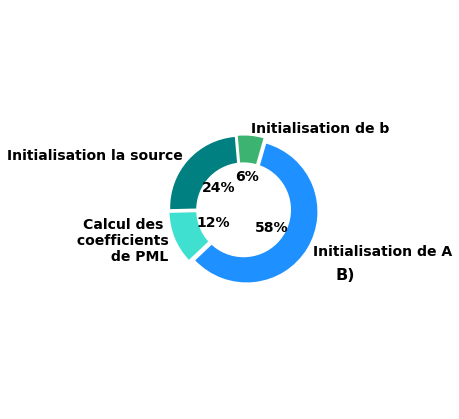

In [353]:
import matplotlib.pyplot as plt
# Pie chart
labels = ['Initialisation la source', "Calcul des \n coefficients\n de PML", 'Initialisation de A', 'Initialisation de b']
sizes = [8, 0.1*39, 0.5*39,0.05*39]
#colors
colors = ['teal','turquoise','dodgerblue','mediumseagreen',"seagreen"]
 
fig1, ax = plt.subplots(figsize=(6,6))
explode = (0.05,0.05,0.05,0.05)
patches, texts, autotexts=ax.pie(sizes, colors = colors, labels=labels, autopct='%1.0f%%', pctdistance=0.42, startangle=95,explode=explode, textprops={'fontsize': 14, "fontweight":"bold"})
#draw circle
centre_circle = plt.Circle((0,0),0.67,fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)
# Equal aspect ratio ensures that pie is drawn as a circle
ax.axis('equal') 
#ax.text(0,0,"L'initialisation",fontsize=16,fontweight="bold")
ax.text(1.3,-0.99,"B)",fontsize=16,fontweight="bold")
plt.tight_layout()
plt.savefig("Resultats/Repartition_Initialisation.png",dpi=200, bbox_inches='tight')

plt.show()